In [0]:
import torch  
from skimage import data
from skimage import io
from skimage.viewer import ImageViewer
from skimage import filters
import numpy as np

In [0]:
imge = data.coins() # imgeyi yukleyelim

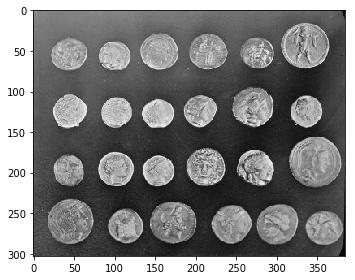

In [0]:
io.imshow(imge) #imgemize bakalım

In [0]:
dik_kenarlar = filters.sobel_v(imge) # dik kenarları sobel operatörü ile bulalım
yatay_kenarlar = filters.sobel_h(imge) # yatay kenarları sobel operatörü ile bulalım

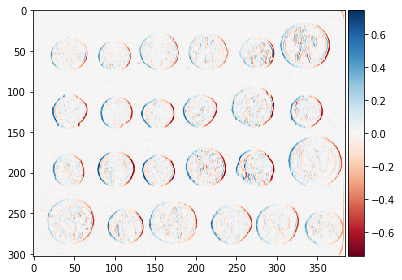

In [0]:
io.imshow(dik_kenarlar) #imgemize bakalım

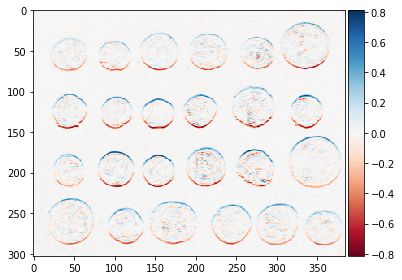

In [0]:
io.imshow(yatay_kenarlar) #imgemize bakalım

In [0]:
class KenarBulucu(torch.nn.Module):
  def __init__(self):
    super(KenarBulucu, self).__init__()

    self.filtre = torch.nn.Conv2d(1,2,3, padding=1, bias=False)

  def forward(self, x):
    x = self.filtre(x)
    return x

In [0]:
kenar_bulucumuz = KenarBulucu()

In [0]:
loss = torch.nn.MSELoss(reduce='sum')
optimizer = torch.optim.Adam(kenar_bulucumuz.parameters(), lr=0.05)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [0]:
imge_tensor = torch.FloatTensor(imge)
dik_kenar_tensor = torch.FloatTensor(dik_kenarlar) 
yatay_kenar_tensor = torch.FloatTensor(yatay_kenarlar) 

imge_tensor = torch.unsqueeze(imge_tensor, 0).unsqueeze(0)
dik_kenar_tensor = torch.unsqueeze(dik_kenar_tensor, 0).unsqueeze(0)
yatay_kenar_tensor = torch.unsqueeze(yatay_kenar_tensor, 0).unsqueeze(0)


for i in range(1000):

  optimizer.zero_grad()

  cikti = kenar_bulucumuz(imge_tensor)

  l = loss(cikti[0, 0, :, :], dik_kenar_tensor) + \
      loss(cikti[0, 1, :, :], yatay_kenar_tensor)

  l.backward()

  optimizer.step()

  print("Loss: {}".format(l.data))



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1, 1, 303, 384])) that is different to the input size (torch.Size([303, 384])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss: 17981.923828125
Loss: 5075.95556640625
Loss: 1341.612060546875
Loss: 2454.023681640625
Loss: 4174.67919921875
Loss: 4827.48779296875
Loss: 4346.025390625
Loss: 3407.65673828125
Loss: 2467.839599609375
Loss: 1624.23876953125
Loss: 992.5112915039062
Loss: 764.8477783203125
Loss: 993.4159545898438
Loss: 1491.972900390625
Loss: 1926.637451171875
Loss: 2001.0013427734375
Loss: 1633.36376953125
Loss: 1004.73583984375
Loss: 434.69195556640625
Loss: 183.70306396484375
Loss: 307.9925231933594
Loss: 644.8470458984375
Loss: 935.8583984375
Loss: 999.7535400390625
Loss: 826.8143310546875
Loss: 545.5072021484375
Loss: 313.7934875488281
Loss: 220.16708374023438
Loss: 252.51678466796875
Loss: 337.629150390625
Loss: 404.64263916015625
Loss: 422.18829345703125
Loss: 395.33209228515625
Loss: 341.99981689453125
Loss: 276.61859130859375
Loss: 212.052490234375
Loss: 166.54571533203125
Loss: 158.03451538085938
Loss: 187.7729034423828
Loss: 231.81619262695312
Loss: 253.6970977783203
Loss: 231.2657165527

In [0]:
test_imge = torch.FloatTensor(data.camera())

test_imge = test_imge.unsqueeze(0).unsqueeze(0)

with torch.no_grad():
    cikti_test = kenar_bulucumuz(test_imge)

kenar_bulucumuz.state_dict()

OrderedDict([('filtre.weight', tensor([[[[ 0.0054, -0.0107,  0.0071],
                        [-0.0119,  0.0159, -0.0078],
                        [ 0.0051, -0.0098,  0.0067]]],
              
              
                      [[[-0.0006, -0.0020, -0.0005],
                        [-0.0005,  0.0002, -0.0005],
                        [ 0.0011,  0.0018,  0.0011]]]]))])

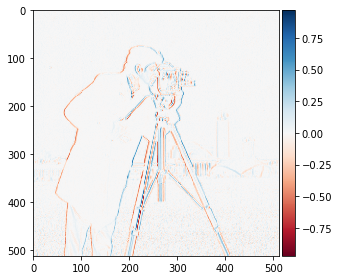

In [0]:
cikti_0 = np.squeeze(cikti_test.numpy()[0, 0, :, :]) 

io.imshow(cikti_0)

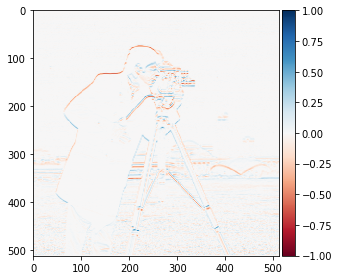

In [0]:
cikti_1 = np.squeeze(cikti_test.numpy()[0, 1, :, :]) 

io.imshow(cikti_1)

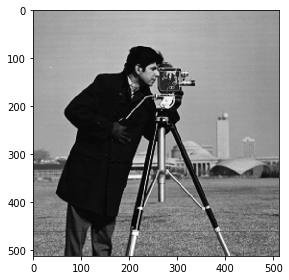

In [0]:
io.imshow(data.camera())